In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import maxwell
from math import pi
%matplotlib inline

# Распределение Максвелла
# https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution
# Формулы матожидания и дисперсии:

Mean:
$ \mu=2a\sqrt{\frac{2}{\pi}} $

Variance:
$ \sigma^2=\frac{a^2(3\pi-8)}{\pi} $

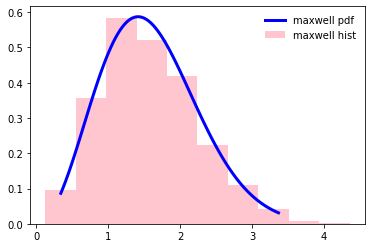

In [3]:
# Создадим выборки r, x объемом 1000 для гистограммы и теоретической плотности соответственно
r = maxwell.rvs(size=1000)

x = np.linspace(maxwell.ppf(0.01), maxwell.ppf(0.99), 100)

plt.plot(x, maxwell.pdf(x), 'b-', lw=3, label='maxwell pdf')
plt.hist(r, density=True, histtype='stepfilled', alpha=0.9, color='pink', label='maxwell hist')
plt.legend(loc='best', frameon=False)
plt.show()

In [4]:
n = [5, 10, 15, 50, 150]   # Список объемов выборок для последующей генерации тысячи выборок размера n[i] 

In [5]:
def my_f(n_list):
    """
    Функция принимает на вход список интов n и возвращает numpy массив
    размером 1000 * длинна списка
    """
    result = []
    for item in n_list:
        temp = []
        for c in range(1000):
            val = maxwell.rvs(size=item)
#             val = val.tolist()
            temp.append(val)
        result.append(np.array(temp))
    
#     result = np.array(result)    
    return result

In [10]:
# Генерируем по тысяче выборок для каждого значения n из списка
# В нашем случае получаются массивы 1000*5, 1000*10, 1000*15
s = my_f(n)   

n5, n10, n15 = s[0], s[1], s[2]
n50 = s[3]
n150 = s[4]
print('n5 shape = ', n5.shape,
      '\nn10 shape = ', n10.shape,
      '\nn15 shape = ', n15.shape)

n5 shape =  (1000, 5) 
n10 shape =  (1000, 10) 
n15 shape =  (1000, 15)


In [11]:
def my_f2(x):
    """
    Функция принимает на вход выборку размера 1000 * n и возвращает numpy
    массив средних выборки размера n
    """
    result = []
    for item in x:
        temp = []
        for value in item:
            temp.append(value)
        me = sum(temp) / len(temp)
        result.append(me)
    return np.array(result)


In [12]:
# Расчет средних для выборок n = [5, 10, 15, 50, 150]
# при помощи функции из блока выше
t5 = my_f2(n5)
t10 = my_f2(n10)
t15 = my_f2(n15)
t50 = my_f2(n50)
t150 = my_f2(n150)

In [13]:
def numer(i, j):
    return (i - j) ** 2


def std_dev(rvs, mean):
    """
    Стандартное отклонение, на вход два массива, на выход значение.
    Необходимо для:
    Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.
    Будьте внимательны с параметрами функции, она принимает на вход не дисперсию,
    а стандартное отклонение.
    """
    rvs = rvs.tolist()
    mean = mean.tolist()
    new_list = (zip(rvs, mean))
    
    temp = []
    for tup in new_list:
        t = numer(*tup)
        temp.append(t)
    
    return (sum(temp)/(len(temp) - 1)) ** 0.5


def mw_pdf(x, a=1):
    """
    Функция плотности вероятности
    """
    pdf = ((2 / pi) ** 0.5) * (x ** 2) * (e ** ((-x ** 2) / 2 * (a ** 2))) / (a ** 3)
    return pdf


def m_mean(a=1):
    """
    Среднее значение
    """
    m = 2 * a * (2 / pi) ** 0.5   # станет мю для нормального распределения
    return m


def m_var(a=1):
    """
    Расчет дисперсии
    """
    sig_2 = (a ** 2) * (3 * pi - 8) / pi 
    return sig_2

In [14]:
# При помощи формул из блока выше вычисляем
# параметры необходимые для отображения графиков
"""
Используя информацию о среднем и дисперсии исходного
распределения (её можно без труда найти в википедии),
посчитайте значения параметров нормальных распределений,
которыми, согласно центральной предельной теореме,
приближается распределение выборочных средних.
"""
mu5 = m_mean()
mu10 = m_mean()
mu15 = m_mean()
mu50 = m_mean()
mu150 = m_mean()

l5 = (m_var()/5)**0.5
l50 = (m_var()/50)**0.5
l150 = (m_var()/150)**0.5
l10 = (m_var()/10)**0.5
l15 = (m_var()/15)**0.5

# График для выборки из n=5

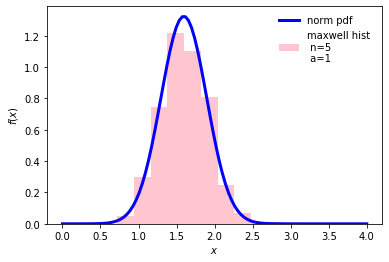

In [15]:
y = sts.norm(loc=mu5, scale=l5)
x = np.linspace(0,4,100)


plt.plot(x, y.pdf(x), 'r-', lw=3, color='blue', label='norm pdf')
plt.hist(t5, density=True, histtype='stepfilled', alpha=0.9, color='pink', label='maxwell hist \n n=5 \n a=1')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

# График для выборки из n=10

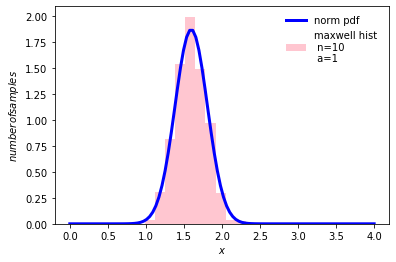

In [16]:

y = sts.norm(loc=mu10, scale=l10)
x = np.linspace(0,4,100)


plt.plot(x, y.pdf(x), 'r-', lw=3, color='blue', label='norm pdf')
plt.hist(t10, density=True, histtype='stepfilled', alpha=0.9, color='pink', label='maxwell hist \n n=10 \n a=1')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$number of samples$')
plt.show()

# График для выборки из n=15

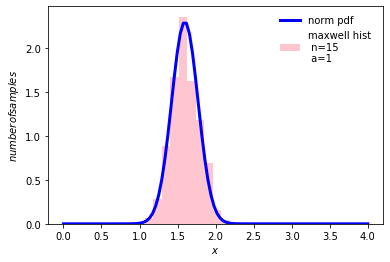

In [17]:

y = sts.norm(loc=mu15, scale=l15)
x = np.linspace(0,4,100)


plt.plot(x, y.pdf(x), 'r-', lw=3, color='blue', label='norm pdf')
plt.hist(t15, density=True, histtype='stepfilled', alpha=0.9, color='pink', label='maxwell hist \n n=15 \n a=1')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$number of samples$')
plt.show()

# График для выборки из n=50

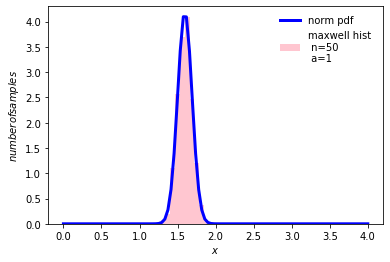

In [18]:

y = sts.norm(loc=mu50, scale=l50)
x = np.linspace(0,4,100)


plt.plot(x, y.pdf(x), 'r-', lw=3, color='blue', label='norm pdf')
plt.hist(t50, density=True, histtype='stepfilled', alpha=0.9, color='pink', label='maxwell hist \n n=50 \n a=1')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$number of samples$')
plt.show()

# График для выборки из n=150

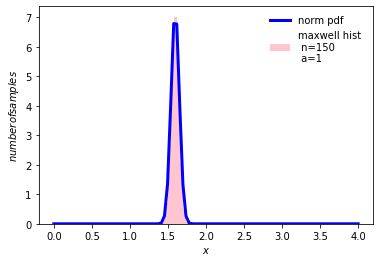

In [19]:

y = sts.norm(loc=mu150, scale=l150)
x = np.linspace(0,4,100)


plt.plot(x, y.pdf(x), 'r-', lw=3, color='blue', label='norm pdf')
plt.hist(t150, density=True, histtype='stepfilled', alpha=0.9, color='pink', label='maxwell hist \n n=150 \n a=1')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$number of samples$')
plt.show()

# Вывод неутешителен, с ростом n точность аппроксимации растет.